# TP no 4 : Arbres de Classification 
## Import :


In [47]:
from sklearn import tree
from tptreesource import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d,
                           frontiere_new)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split



## Arbres de décision - Algorithme CART
### Question 1 :

### Question 2 :


In [2]:
n = 115
Result_Checkers = rand_checkers(n,n,n,n)
X_checkers = Result_Checkers[:, 0:2]
y_checkers = Result_Checkers[:, 2]
X_test = X_checkers[1::2].astype(int)
y_test = y_checkers[1::2].astype(int)
X_train = X_checkers[0::2].astype(int)
y_train = y_checkers[0::2].astype(int)
len(X_checkers)

448

In [75]:
def err ( impurity, X_train, y_train, X_test, y_test, max_depth):
    err = []
    for k in range(1,max_depth):   
        DT = tree.DecisionTreeClassifier(criterion = impurity, max_depth =k)
        DT.fit(X_train, y_train)
        err.append(1- DT.score(X_test, y_test))
    return np.argmin(err), err



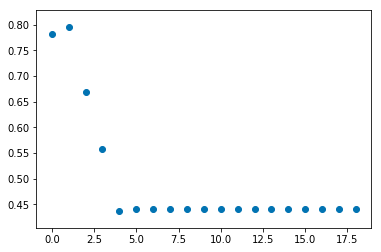

In [76]:
err_gini_min , err_gini = err('gini', X_train, y_train, X_test, y_test, 20)   
plt.figure()
plt.scatter(range(0,len(err_gini)), err_gini )

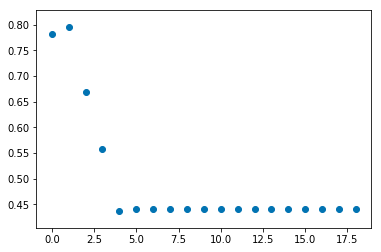

In [77]:
err_entropy_min , err_entropy = err('entropy', X_train, y_train, X_test, y_test, 20)   

plt.figure()
plt.scatter(range(0,len(err_entropy)),err_entropy )


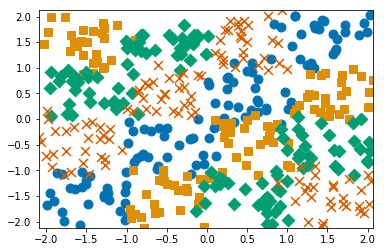

In [78]:
plot_2d(X_checkers,y_checkers)

In [79]:
#Création d'une fonction permettant d'utiliser plt2d et "frontière_new"
def plot_frontiere(X, y, impurity, max_depth) :
    
    X_train = X[::2]
    y_train = y[::2].astype(int)
    X_test = X[1::2]
    y_test = y[1::2].astype(int)
    
    err = []
    for k in range(1,max_depth):
        DT = tree.DecisionTreeClassifier(criterion= impurity, max_depth= k)
        DT.fit(X_train, y_train)
        err.append(1- DT.score(X_test, y_test))
    
    min_max_depth= np.argmin(err)
    
    DTmin = tree.DecisionTreeClassifier(criterion= impurity, max_depth= min_max_depth)
    DTmin.fit(X_train, y_train)
    
  
    
    #création de la fonction de la frontière de decision :
    def decision_function (X):
        return DTmin.predict(X)
    
    plt.figure(figsize= (12,12))
    #plot_2d(X_train, y_train)
    frontiere_new(decision_function, X_train, y_train, w=None, step = 50, alpha_choice = 1)
    plt.title("Mise en evidence des frontières pour une impuritée de type : " + impurity)

    



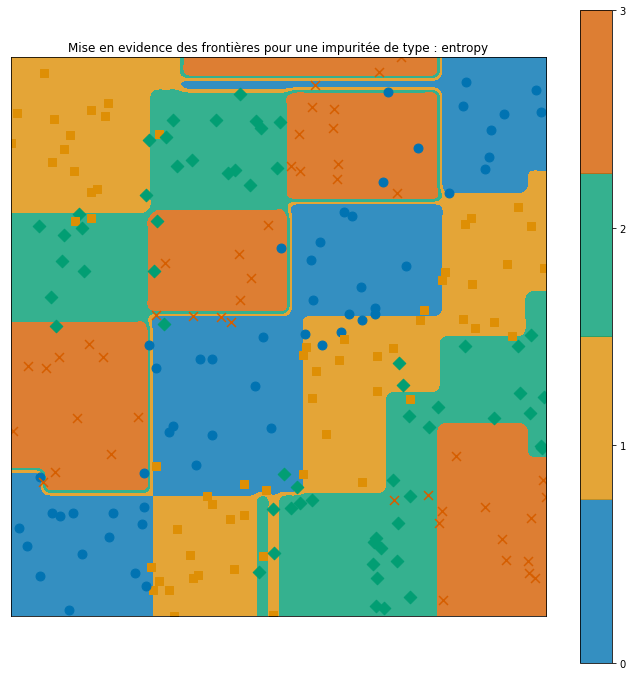

In [80]:
plot_frontiere(X_checkers, y_checkers, impurity= 'entropy', max_depth=20)

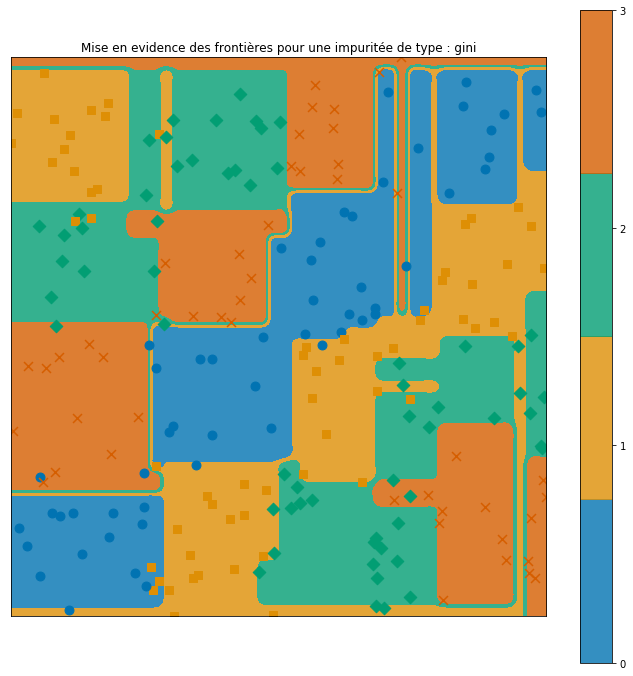

In [81]:
plot_frontiere(X_checkers, y_checkers, impurity= 'gini', max_depth=20)

### Question 4 :

In [82]:
#from os import system
#import pydot
dtree_entropy = tree.DecisionTreeClassifier(criterion = "entropy", max_depth= err_entropy_min)
dtree_entropy = dtree_entropy.fit(X_train, y_train)


dotfile = open("/Users/anthonyhoudaille/Desktop/dtree_entropy.dot", 'w')
tree.export_graphviz(dtree_entropy, out_file = dotfile)
dotfile.close()
#system("dot -Tpng /Users/anthonyhoudaille/Desktop/.dot -o /Users/anthonyhoudaille/Desktop/dtree2.png")
#pydot.graph_from_dot_data(dtree2.dot).write_png("dtree2.png")
from subprocess import check_call
check_call(['dot','-Tpng','/Users/anthonyhoudaille/Desktop/dtree_entropy.dot','-o','/Users/anthonyhoudaille/Desktop/dtree_entropy.png'])

0

In [83]:
#from os import system
#import pydot
dtree_gini = tree.DecisionTreeClassifier(criterion = "gini", max_depth= err_gini_min)
dtree_gini = dtree_gini.fit(X_train, y_train)


dotfile = open("/Users/anthonyhoudaille/Desktop/dtree_gini.dot", 'w')
tree.export_graphviz(dtree_gini, out_file = dotfile)
dotfile.close()
#system("dot -Tpng /Users/anthonyhoudaille/Desktop/.dot -o /Users/anthonyhoudaille/Desktop/dtree2.png")
#pydot.graph_from_dot_data(dtree2.dot).write_png("dtree2.png")
from subprocess import check_call
check_call(['dot','-Tpng','/Users/anthonyhoudaille/Desktop/dtree_gini.dot','-o','/Users/anthonyhoudaille/Desktop/dtree_gini.png'])

0

### Question 5 :

In [84]:
n = 40
Result_Checkers = rand_checkers(n,n,n,n)
X_checkers2 = Result_Checkers[:, 0:2]
y_checkers2 = Result_Checkers[:, 2].astype(int)

len(X_checkers2)

160

In [85]:
err_gini = 1- dtree_gini.score(X_test, y_test)
err_entropy = 1- dtree_entropy.score(X_test, y_test)

print("La proportion d'erreur pour une impuritée de type 'gini' est : %.3f" %err_gini)
print("La proportion d'erreur pour une impuritée de type 'entropy' est : %.3f" %err_entropy)

La proportion d'erreur pour une impuritée de type 'gini' est : 0.558
La proportion d'erreur pour une impuritée de type 'entropy' est : 0.558


Au bout d'une certaine valeur de max_depth, les deux courbes d'impuritée 'gini' et 'entropy' tendent vers la même valeur d'erreur. 

### Question 6 :

In [86]:
digits = datasets.load_digits()

X_digit = pd.DataFrame(digits.data[:])
Y_digit = pd.DataFrame(digits.target[:])
X_train_digit, X_test_digit = train_test_split(X_digit, test_size=0.2)
y_train_digit, y_test_digit = train_test_split(Y_digit, test_size=0.2)

err_entropy_digit_min , err_entropy_digit = err('entropy', X_train_digit, y_train_digit, X_test_digit, y_test_digit, 50)
dtree_entropy_digit = tree.DecisionTreeClassifier(criterion = "entropy", max_depth= err_entropy_digit_min)
dtree_entropy_digit = dtree_entropy_digit.fit(X_train_digit, y_train_digit)

err_gini_digit_min , err_gini_digit = err('gini', X_train_digit, y_train_digit, X_test_digit, y_test_digit, 50)
dtree_gini_digit = tree.DecisionTreeClassifier(criterion = "gini", max_depth= err_entropy_digit_min)
dtree_gini_digit = dtree_gini_digit.fit(X_train_digit, y_train_digit)

err_gini = 1- dtree_gini_digit.score(X_test_digit, y_test_digit)
err_entropy = 1- dtree_entropy_digit.score(X_test_digit, y_test_digit)

print("La proportion d'erreur pour une impuritée de type 'gini' est : %.3f" %err_gini)
print("La proportion d'erreur pour une impuritée de type 'entropy' est : %.3f" %err_entropy)

La proportion d'erreur pour une impuritée de type 'gini' est : 0.925
La proportion d'erreur pour une impuritée de type 'entropy' est : 0.908


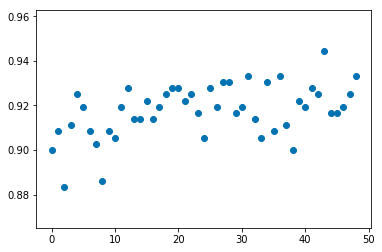

In [87]:
plt.figure()
plt.scatter(range(0,len(err_entropy_digit)), err_entropy_digit )

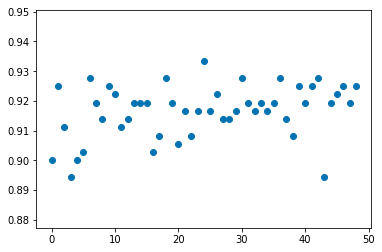

In [88]:
plt.figure()
plt.scatter(range(0,len(err_gini_digit)), err_gini_digit )

### Question 7 :